# Increase in revenue for a large online shop


**Research task:**

Prioritize hypotheses (part 1), run an A/B-test (2 part) and analyze the results. 

**Research goal:**

Increase revenue using one of the hypotheses prepared by the marketing department (9). 

**Research plan:**

[**Part 1. Prioritization of hypotheses.**](#part1)


- [1. Load libraries, load and check dataset](#part11)
- [2. Using ICE framework](#part12)
- [3. Using RICE framework](#part13)
- [4. How the prioritization has changed with different frameworks](#part14)
- [5. Conclusions from the firts part.](#part15)

[**Data preprocessing**](#between)


- [1. Load and check dataset of Orders](#between1)
- [2. Load and check dataset of Visits.](#between2)
- [3. Preprocessing conclusions](#between3)


[**Part 2. A/B-test analysis.**](#part2)

- [1. Graph of cumulative revenue by group](#part21)
- [2. Graph of cumulative average bill by group](#part22)
- [3. Graph of the relative change in the cumulative average bill of Group B to group A](#part23)
- [4. Graph of cumulative conversion by group](#part24)
- [5. Graph of the relative change in the cumulative conversion of group B to group A](#part25)
- [6. Dot plot of the number of orders bu user](#part26)
- [7. 95th and 99th percentiles of the number of orders per user](#part27)
- [8. Histogram of order values](#part28)
- [9. 95th and 99th percentiles of order costs](#part29)
- [10. Statistical significance of differences in conversion between groups based on "raw" data](#part210)
- [11. Statistical significance of differences in average bill between groups based on "raw" data](#part211)
- [12. Statistical significance of differences in conversion between groups based on "cleaned" data](#part212)
- [13. Statistical significance of differences in average bill between groups based on "cleaned" data](#part213)
- [14. Test result decision](#part214)

[**15. Conclusions from the second part.**](#part215)


# Part 1. Prioritization of hypotheses.<a class="anchor" id="part1"></a>

## 1. Load libraries, load and check dataset<a class="anchor" id="part11"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import datetime as dt
import scipy.stats as stats

In [5]:
try:
    hypotheses = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypotheses = pd.read_csv('/Users/lqbaha/Downloads/datasets/hypothesis.csv')

Let's take a look at the dataset, make the indexes more convinient and display the full text of the hypotheses. 

In [6]:
hypotheses.index += 1 
pd.set_option("max_colwidth", 150)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


We see 9 hypotheses, columns with scores (on a 10-point scale) of the components: Reach, Impact, Confidence and Efforts. 


Let's add new columns with prioritization calculations: ICE and RICE. And sort by the first one and then by a second.

## 2. Using ICE framework<a class="anchor" id="part12"></a>

In [10]:
hypotheses['ICE'] = round(
    (hypotheses['Impact'] * hypotheses['Confidence']) 
    / hypotheses['Efforts'],2)

hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


So the most important hypothesis by prioritization with framework ICE are:

1. 9th - 'Launch a promothion that gives a discount on a product on the birtday', 16.20 points. 
2. 1st - 'Add two new channels to attract traffic, which will bring in 30% more users', 13.33 points.
3. 8th - 'Add a subscription form to all the main pages to collect a client base for email newsletters', 11.20 point. 

## 3. Using RICE framework<a class="anchor" id="part13"></a>

In [23]:
hypotheses['RICE'] = (
    hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Efforts']

hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


And with a prioritization by framework RICE we have a different significance: 

1. 8th - 'Add a subscription form to all the main pages to collect a client base for email newsletters', 112.0
2. 3d - 'Add product recommendation blocks to the online store website to increase conversion and average check of the order', 56.0
3. 1st - 'Add two new channels to attract traffic, which will bring in 30% more users', 40.0.

# 5. Conclusions from the firts part.<a class="anchor" id="part15"></a>

According to the first method (ICE), we have leaders: hypotheses №9, 1 и 8.  

And according to the second method (RICE) - №8, 3, 1 и 7. 

The ninth hypothesis we will reject, because although the level of the Confidence is the highest, but its Impact on users is lower, but more importantly the Reach of useres affected by the change = 1. 

**Therefore we prioritize hypotheses №8 (maximum Reach and high Confidence), №1 (maximum Impact and high Confidence) and №3 (high level of Reach, Confidence + low testing costs).** 

# Data preprocessing<a class="anchor" id="between"></a>


## 1. Load and check dataset of Orders.<a class="anchor" id="between1"></a>

In [24]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('/Users/lqbaha/Downloads/datasets/orders.csv')

Let's take a look at the dataset of Orders, check the duplicates, misiing values and types of the data 

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [26]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Will rename the columns to make it clearer with users IDs and orders.

In [27]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [28]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [29]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [30]:
orders.duplicated().sum()

0

Let's check the dates, which period is involved. 

In [31]:
print('First date:', orders['date'].min(), 
      'Last date:', orders['date'].max())

First date: 2019-08-01 00:00:00 Last date: 2019-08-31 00:00:00


Let's check how correctly the separation into groups was perfomed. 

In [36]:
doubled_visitors = orders.pivot_table(
    index= 'visitor_id', 
    values= 'group', 
    aggfunc= 'nunique').reset_index().query('group > 1')

In [37]:
doubled_visitors.count()

visitor_id    58
group         58
dtype: int64

In [38]:
print("Total number of entries in Orders:", len(orders['visitor_id']))

Total number of entries in Orders: 1197


In [44]:
print("Number of users caught in both grous: ", len(doubled_visitors))

Number of users caught in both grous:  58


In [46]:
print("Proportion of users caught in both groups: ", 
      round(len(doubled_visitors) / len(orders['visitor_id'])*100, 2), "%")

Proportion of users caught in both groups:  4.85 %


In [47]:
print("Number of entries in group A: ", orders[orders['group'] == 'A']['visitor_id'].count())

Number of entries in group A:  557


In [48]:
print("Number of entries in group B: ", orders[orders['group'] == 'B']['visitor_id'].count())

Number of entries in group B:  640


In [50]:
print("Proportion of users caught in both groups in the group A: ", 
      round(len(doubled_visitors) / orders[orders['group'] == 'A']['visitor_id'].count()*100,2), "%")

Proportion of users caught in both groups in the group A:  10.41 %


In [51]:
print("Proportion of users caught in both groups in the group B: ", 
      round(len(doubled_visitors) / orders[orders['group'] == 'B']['visitor_id'].count()*100,2), "%")

Proportion of users caught in both groups in the group B:  9.06 %


Found 58 users who figure in both group A and group B.  

As this is less than 5% of the total number of enties, but about 10% for each of the groups - let's delete these entries. Since we need to test how hypothesis affect the indicators - these 58 users may prevent us from checking wheter it is really about the hypothesis. 

In [52]:
orders = orders[~orders['visitor_id'].isin(doubled_visitors['visitor_id'])]

## 2. Load and check dataset of Visits.<a class="anchor" id="between2"></a>

In [53]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('/Users/lqbaha/Downloads/datasets/visitors.csv')

Let's take a look at the dataset of Orders, check the duplicates, misiing values and types of the data.

In [54]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [55]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [56]:
visitors.duplicated().sum()

0

In [57]:
visitors.duplicated().sum()

0

In [58]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Let's check the dates, which period is involved. 

In [59]:
print('First date:', visitors['date'].min(), 'Last date:', visitors['date'].max())

First date: 2019-08-01 00:00:00 Last date: 2019-08-31 00:00:00


# 3. Preprocessing conclusions.<a class="anchor" id="between3"></a>

We have already carried out an A/B-test and need to verify the result. 

We have clean data, no missing values, no duplicates, we've changed the data type to make it easier to work with. 

The period under consideration in both datasets is from 1st to 1st August 2019. 

We also checked how correctly the separation into groups was perfomed and found 58 users who figure in both group A and group B.

As this is less than 5% of the total number of enties, but about 10% for each of the groups. Since we need to test how hypothesis affect the indicators - these 58 users may prevent us from checking wheter it is really about the hypothesis, so we decieded to delete these entries. 

# Part 2. A/B-test analysis.<a class="anchor" id="part2"></a>


## 1. Graph of cumulative revenue by group.<a class="anchor" id="part21"></a>

First of all we need to create a new dataset with a cumulative data by days with orders, separeted by groups. 

In [60]:
# create an array of unique pairs of date values and test groups

dates_groups = orders[['date','group']].drop_duplicates()

In [61]:
# get agregated cumulative data by days (orders info)

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transaction_id' : 'nunique', 
         'visitor_id' : 'nunique', 
         'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

In [62]:
# get agregated cumulative data by days (visits info)

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [64]:
# merge cumulative data in one dataset 

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, 
    left_on=['date', 'group'], 
    right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


And we have a dataset with cumulative data ready, so we will use it to make graps. 

And also separate it by groups. 

In [67]:
# dataset with cumulative number of orders and cumulative revenue by day in group A

cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [69]:
# dataset with cumulative number of orders and cumulative revenue by day in group B 

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

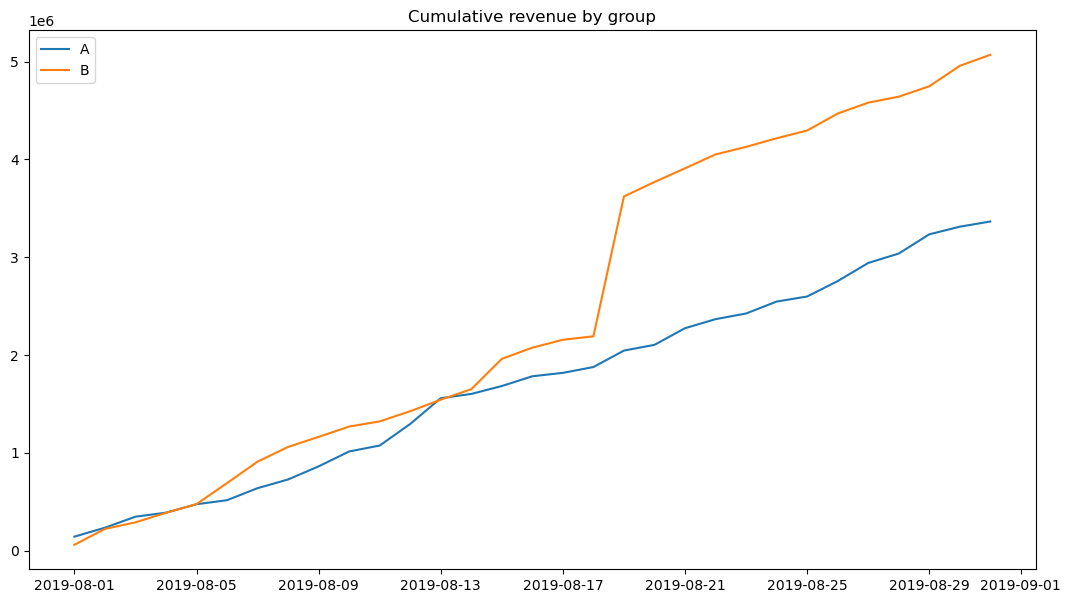

In [70]:
plt.figure(figsize=(13,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title("Cumulative revenue by group")
plt.legend() 
plt.show()

Revenue for half of the month increased evenly in both groups, but then group A continued to grow at a steady  pace, but the group B shows a sharp jump and then also a steady growth afterwards.

Maybe it's about a onetime very expensive order, we need to check this later. 

## 2. Graph of cumulative average bill by group.<a class="anchor" id="part22"></a> 

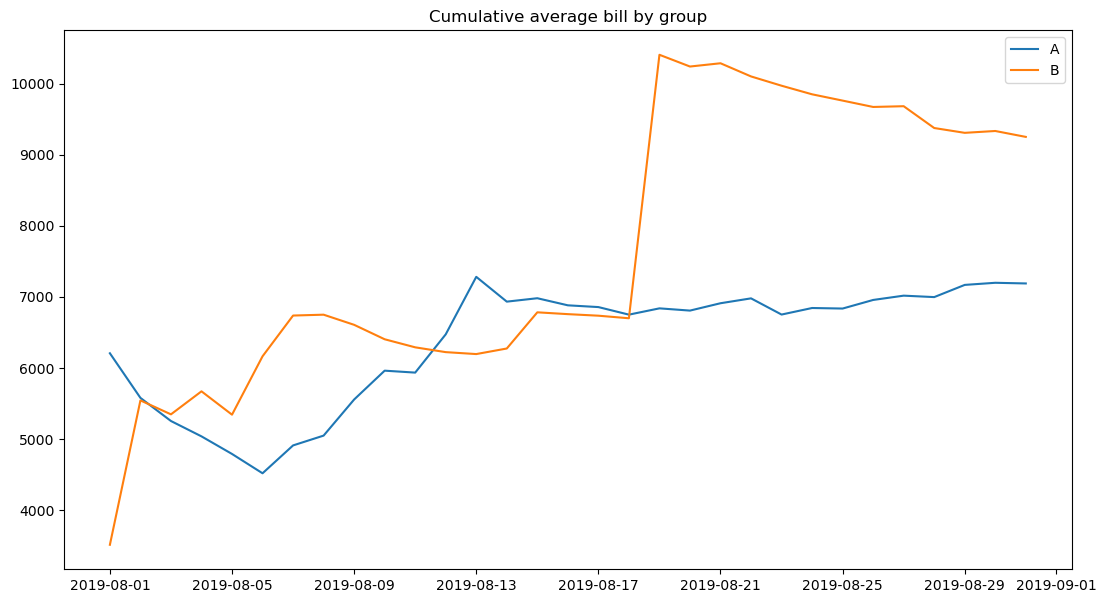

In [71]:
plt.figure(figsize=(13,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title("Cumulative average bill by group")
plt.legend() 
plt.show()

The average bill in Group A was rising by the middle of the month, but becomes more even in the second half of the chart. 

What is not to be said about Group B, whoso bill was rising by almost 1.5 times, but in the second half of the chart we can see a decline, and the line shows quite unusual movements during the whole period of observation. There could be anomalies in the data.  

## 3. Graph of the relative change in the cumulative average bill of Group B to group A.<a class="anchor" id="part23"></a> 

In [73]:
# collect the data in one dataset 

merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B'])

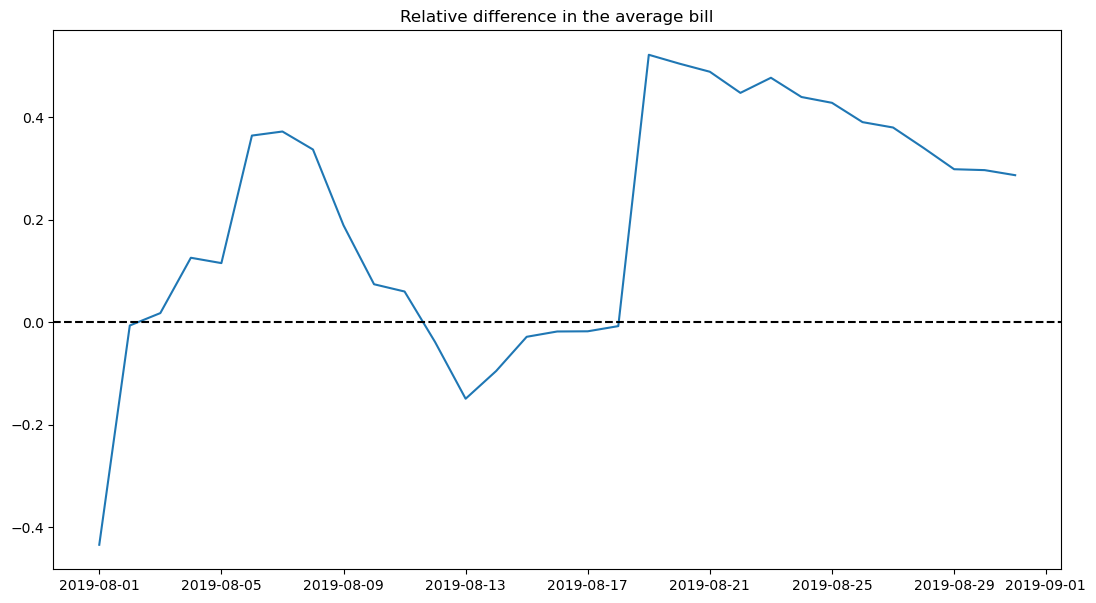

In [74]:
plt.figure(figsize=(13,7))
plt.plot(
    merged_cumulative_revenue['date'], (
    merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB'])/(
        merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA'])-1) 

plt.title("Relative difference in the average bill")
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

The graph is with too abrupt changes, so we are now sure of anomalies and large orders. We'll find them later.

## 4. Graph of cumulative conversion by group.<a class="anchor" id="part24"></a> 

In [75]:
# first add the conversion column to our cumulative dataset 

cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

In [76]:
# and separete data by groups

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

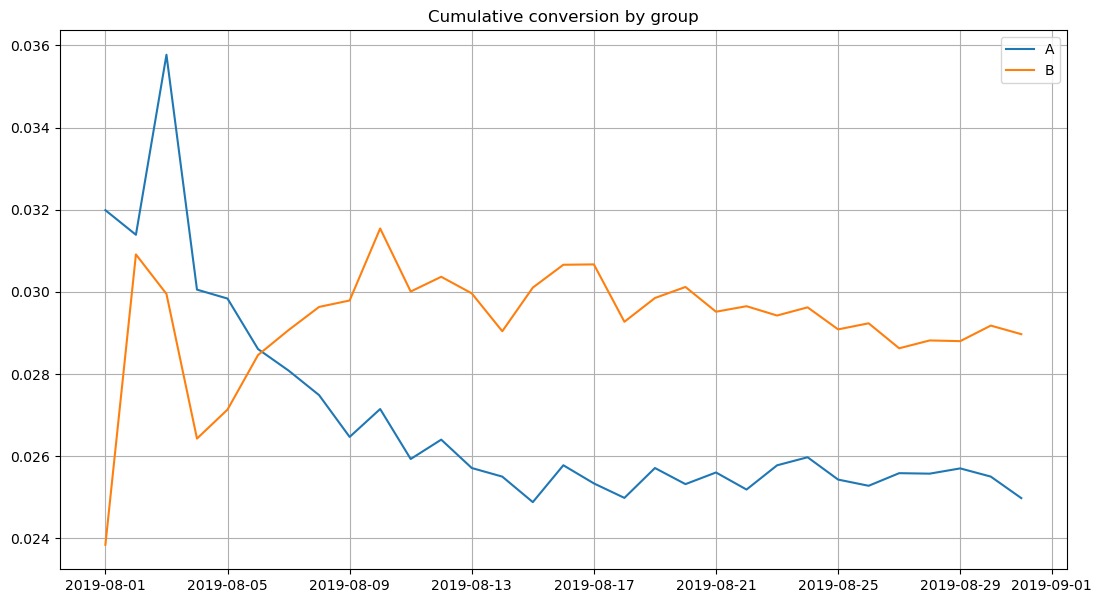

In [77]:
plt.figure(figsize=(13,7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.grid(True)
plt.title("Cumulative conversion by group")
plt.show()

Finally we see a trend towards group averaging. 

Group B's conversion rate is consistently higher than group A's, but both begin to fall towards the end of the period we observed.  

## 5. Graph of the relative change in the cumulative conversion of group B to group A.<a class="anchor" id="part25"></a> 

In [78]:
# collect the data in one dataset 

merged_cumulative_conversions = cumulative_data_a[
    ['date','conversion']].merge(cumulative_data_b[
    ['date','conversion']], 
                                 left_on='date', 
                                 right_on='date', 
                                 how='left', 
                                 suffixes=['A', 'B'])

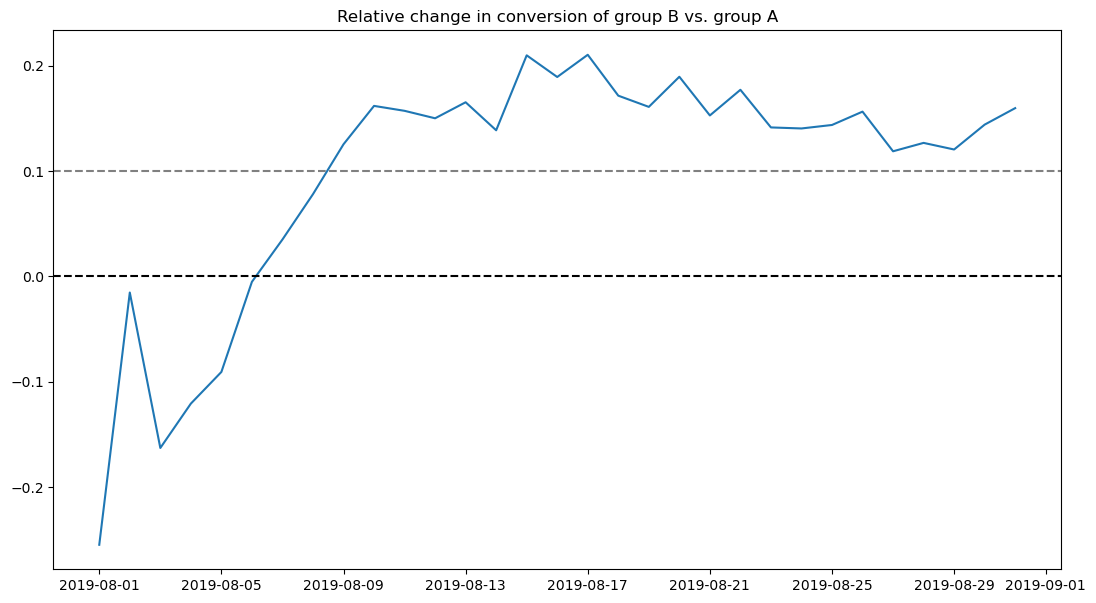

In [79]:
plt.figure(figsize=(13,7))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.title("Relative change in conversion of group B vs. group A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

In the beginning, group A was better in terms of conversion rate, but then group B's conversion increased greatly, becoming better than group A's by at least 10% by the end of the observed period and locking in.  

## 6. Dot plot of the number of orders bu user.<a class="anchor" id="part26"></a> 

In [81]:
# count the number of orders by user

orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns = ['visitor_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(5)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


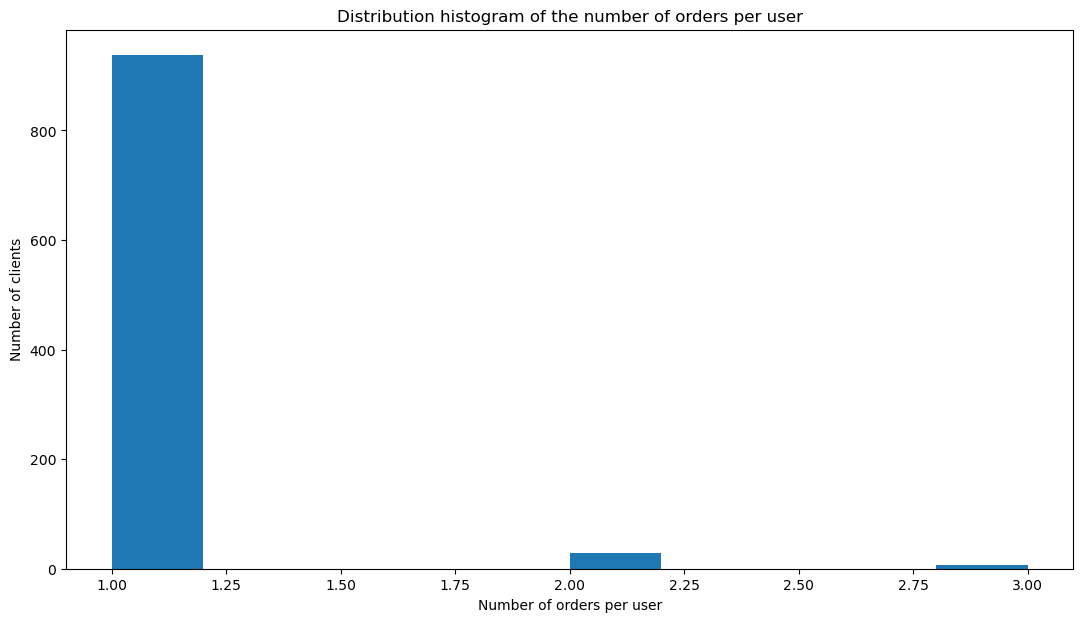

In [82]:
plt.figure(figsize=(13,7))
plt.hist(orders_by_users['orders']) 
plt.ylabel('Number of clients')
plt.xlabel('Number of orders per user')
plt.title('Distribution histogram of the number of orders per user')
plt.show()

Here we see that most users have only placed one order.  

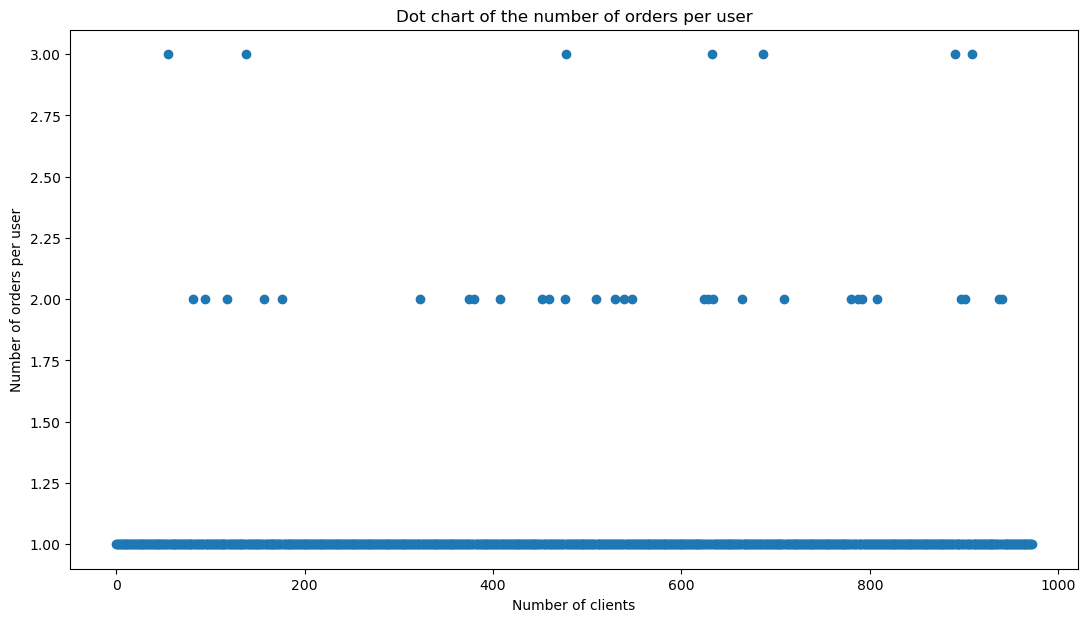

In [86]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(13,7))
plt.xlabel('Number of clients')
plt.ylabel('Number of orders per user')
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Dot chart of the number of orders per user')
plt.show()

Again we see the majority of users with one order, a reasonable number of users with two orders and the rare users who have placed an abnormally large number of orders.

## 7. 95th and 99th percentiles of the number of orders per user.<a class="anchor" id="part27"></a> 

In [84]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

Only 5% of users placed more than 1 order. And 1% of users ordered 2 times. 

So we choose a limit for defining abnormal users of 1 order per user. 

## 8. Histogram of order values.<a class="anchor" id="part28"></a> 

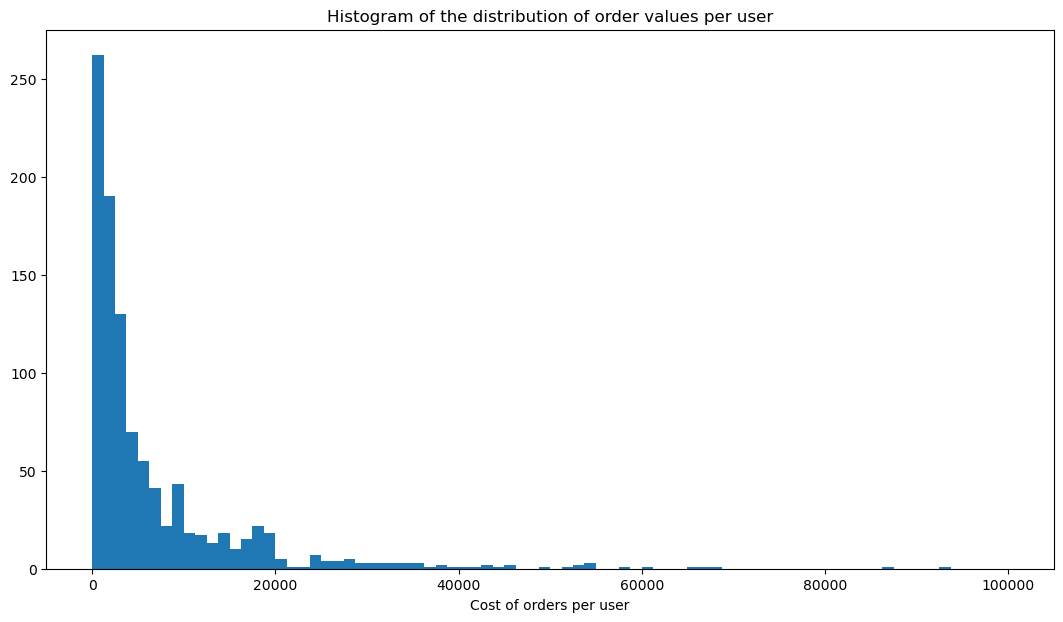

In [85]:
plt.figure(figsize=(13,7))
plt.hist(orders['revenue'], bins = 80, range=(0,100000)) 
plt.xlabel('Cost of orders per user')
plt.title('Histogram of the distribution of order values per user')
plt.show()

Most users do not order more than 10-20k, but there are also very expensive orders approaching 100k. 

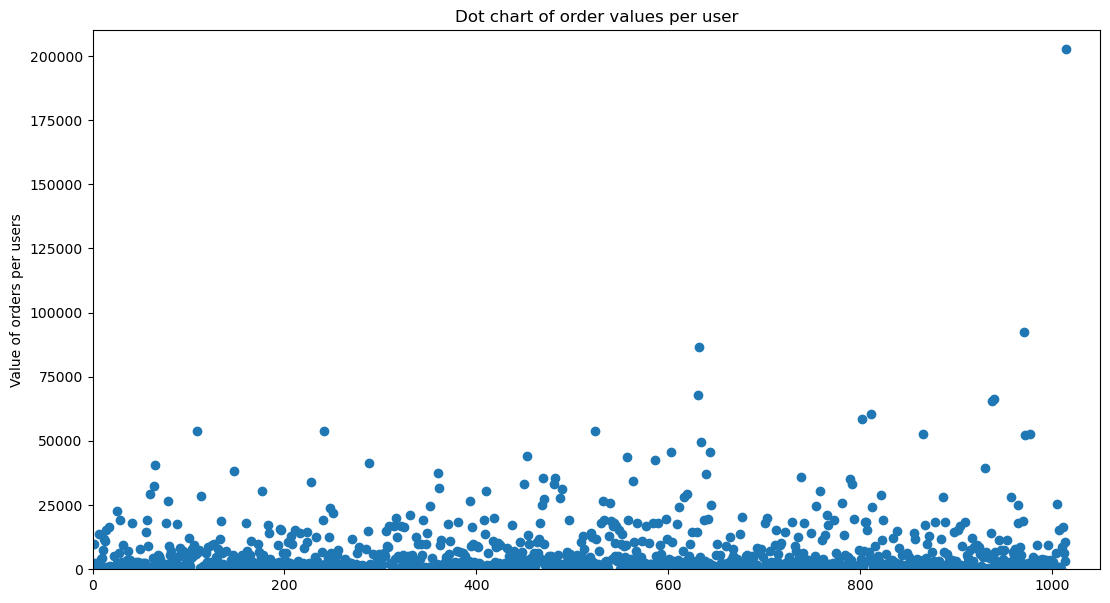

In [87]:
plt.figure(figsize=(13,7))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1050, 0, 210000])
plt.ylabel('Value of orders per users')
plt.title('Dot chart of order values per user')
plt.show()

There are also anomalies on the chart, but also most users place orders worth no more than 30k.

## 9. 95th and 99th percentiles of order costs.<a class="anchor" id="part29"></a> 

In [88]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

No more than 5% of orders are more expensive than 27k. And only no more than 1% is more expensive than 54k. 

We choose a limit for determining abnormal orders values of 27k.  

## 10. Statistical significance of differences in conversion between groups based on "raw" data.<a class="anchor" id="part210"></a> 

Let's formulate hypotheses: 
- Н0 - there is no difference in conversion between groups
- Н1 - there are differences in conversion between the groups

Create variables `orders_by_users_a` and `orders_by_users_b`, where for users who placed at least once, indicate the number of compleate orders. 

Create variables `sample_a` and `sample_b`, in which users from different groups will be matched with the number of orders (if not, 0). 

And we will apply the Mann-Whitney criterion.

In [89]:
orders_by_users_a = orders[
    orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id': pd.Series.nunique})

orders_by_users_a.columns = ['visitor_id', 'orders']

In [90]:
orders_by_users_b = orders[
    orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id': pd.Series.nunique})

orders_by_users_b.columns = ['visitor_id', 'orders']

Let's check if the groups are even. 

In [93]:
print("Number of clients in group A -", len(orders_by_users_a))
print("Number of orders in group А -", orders[orders['group'] == 'A']['transaction_id'].count())
print("Number of visits in group А -", visitors[visitors['group'] == 'A']['visitors'].sum())
print("Number of clients in group B -", len(orders_by_users_b))
print("Number of orders in group B -", orders[orders['group'] == 'B']['transaction_id'].count())
print("Number of visits in group B -", visitors[visitors['group'] == 'B']['visitors'].sum())

Number of clients in group A - 445
Number of orders in group А - 468
Number of visits in group А - 18736
Number of clients in group B - 528
Number of orders in group B - 548
Number of visits in group B - 18916


In [97]:
sample_a = pd.concat(
    [orders_by_users_a['orders'],pd.Series(
        0, index=np.arange(
            visitors[visitors['group']=='A']['visitors'].sum() - len(
                orders_by_users_a['orders'])), name='orders')],axis=0)

In [95]:
sample_b = pd.concat(
    [orders_by_users_b['orders'],pd.Series(
        0, index=np.arange(
            visitors[visitors['group']=='B']['visitors'].sum() - len(
                orders_by_users_b['orders'])), name='orders')],axis=0)

Number of enties in `sample_a` and `sample_b` it's a number of users, and sum of all the elements is the number of orders.

Group A is smallre than group B, so we will make allowance for this in the calculations below.

In [98]:
print('Deviation of group B conversion to group A:', 
      "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

Deviation of group B conversion to group A: 0.160


In [104]:
results =  stats.mannwhitneyu(sample_a, sample_b, True, 'less')

print('p-value', round(results.pvalue,3))
alpha = 0.05 

if results.pvalue < alpha:
    print("We reject the null hypothesis: based on 'raw' data, "\
    "there are differences in conversion between the groups.")
else:
    print("It's not possible to reject the null hypothesis, the conclusion about the difference "\
          "based on 'raw' data the conversion cannot be made.")

p-value 0.006
We reject the null hypothesis: based on 'raw' data, there are differences in conversion between the groups.


The calculation shows that in conversion in groups A and B the difference is statistically significant, the null hypothesis is rejected. We remember the previous graphs, and next let's see what we get with data cleared of anomalies. 

## 11. Statistical significance of differences in the average bill between groups based on "raw" data.<a class="anchor" id="part211"></a> 

Let's formulate hypotheses: 
- Н0 - there is no difference in the average bill between groups
- Н1 - there are differences in the average bill between the groups

In [102]:
print('Deviation of group B average bill to group A:', 
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1)) 

Deviation of group B average bill to group A: 0.287


In [105]:
results =  stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'less')

print('p-value', round(results.pvalue,3))
alpha = 0.05 


if results.pvalue < alpha:
    print("We reject the null hypothesis: based on 'raw' data, "\
    "there are differences in the average bill between the groups.")
else:
    print("It's not possible to reject the null hypothesis, the conclusion about the difference "\
          "based on 'raw' data in the average bill cannot be made.")    

p-value 0.585
It's not possible to reject the null hypothesis, the conclusion about the difference based on 'raw' data in the average bill cannot be made.


Although calculations showed that the average bill of group B is higher than the average bill of group A by 25,9%, this obervation is not statistically significant. We do not reject the null hypothesis - the conclusion about the difference based on 'raw' data in the average bill cannot be made.

## 12. Statistical significance of differences in conversion between groups based on "cleaned" data.<a class="anchor" id="part212"></a> 

As a reminder, we have decided to consider users who have placed more than 1 order and odrers of over 27k as abnormal.

So let's prepare our clean data first. 

Let's formulate hypotheses:

- Н0 - there is no difference in conversion between groups based on 'cleaned' data
- Н1 - there are differences in conversion between the groups based on 'cleaned' data

In [106]:
abnormal_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 1]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)

In [107]:
abnormal_bills = orders[orders['revenue'] > 27000]['visitor_id']

In [108]:
abnormal_users = (
    pd.concat([abnormal_orders, abnormal_bills], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [109]:
print('Number of abnormal users:', abnormal_users.shape[0])

Number of abnormal users: 86


In [110]:
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'], pd.Series(0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ), name='orders')], axis=0)

In [111]:
sample_b_filtered = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'], pd.Series(0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ), name='orders')], axis=0)

In [112]:
print('Deviation of group B conversion to group A:', "{0:.3f}".
      format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

Deviation of group B conversion to group A: 0.174


In [113]:
results =  stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, True, 'less')
print('p-value', round(results.pvalue,3))
alpha = 0.05 


if results.pvalue < alpha:
    print("We reject the null hypothesis: based on 'cleaned' data, "\
    "there are differences in conversion between the groups.")
else:
    print("It's not possible to reject the null hypothesis, the conclusion about the difference "\
          "based on 'cleaned' data the conversion cannot be made.")

p-value 0.008
We reject the null hypothesis: based on 'cleaned' data, there are differences in conversion between the groups.


Even in data cleared of anomalies, there is a difference in conversion rates between groups. Group B's conversion is even higher than it was in the "raw" data.  

## 13. Statistical significance of differences in average bill between groups based on "cleaned" data.<a class="anchor" id="part213"></a> 

Let's formulate hypotheses: 
- Н0 - there is no difference in the average bill between groups based on 'cleaned' data
- Н1 - there are differences in the average bill between the groups based on 'cleaned' data

In [114]:
print('Deviation of group B average bill to group A:', 
      "{0:.3f}".format(orders[np.logical_and(
          orders['group'] == 'B', np.logical_not(
              orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(
            orders['visitor_id'].isin(abnormal_users)),
            )]['revenue'].mean() - 1))

Deviation of group B average bill to group A: -0.034


In [115]:
results =  stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', 
                          np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', 
                          np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'], 
    True, 'less')


print('p-value', round(results.pvalue,3))
alpha = 0.05 


if results.pvalue < alpha:
    print("We reject the null hypothesis: based on 'cleaned' data, "\
    "there are differences in the average bill between the groups.")
else:
    print("It's not possible to reject the null hypothesis, the conclusion about the difference "\
          "based on 'cleaned' data in the average bill cannot be made.")    

p-value 0.637
It's not possible to reject the null hypothesis, the conclusion about the difference based on 'cleaned' data in the average bill cannot be made.


And so the calculation of the average bill showed that there was no statistically significant difference between groups, and the deviation became much smaller. 

But the average group B bill is higher than the average group A bill (and even higher, than it was according to the "raw" data). 


## 14. Test result decision.<a class="anchor" id="part214"></a> 

**In total:**

- THERE IS a statistically significant difference in conversion between the groups for both 'ras' and after-filtered anomalies data. 

- There is NO statistically significant difference in the average bill between groups, either in the 'raw' data or in the data after anomaly filtering.

- Also all the conversion graphs show consistenly higher result for group B than for group A, and the graph of the relative increase in conversion of group B to group A tell us about at least a 10% difference.

- The cleaned data also tells us that the conversion rate is even higher that it was with a 'raw' data. 

# 15. Conclusions from the second part.<a class="anchor" id="part215"></a> 


In pre-testing of the test we found clean data, no missing values, no duplicates, but we also checked how correctly the separation into groups was perfomed and found users who figure in both group A and group B. 

We decieded to delete these entries, because this is less than 5%, but these 58 users may have an impact on the test results. 

The period under consideration in both datasets is from 1st to 1st August 2019.

We analysed the A/B-test in 7 graphs, used percentiles to identify abnormal users and further cleaning of data outliers, and calculation of the 4 statistically significance differences. 

The analysis of the A/B-test is over and it's time to make a decision on the test result. 


Solution options: 
1. Stop the test, record the success of one of the groups. 
2. Stop the test, record no difference between the groups. 
3. Continue the test.


Calculated conversion rates, cumulative matrics of avarage bill and revenue and all our graphs indicate the leadership of group B and fixing the result. 

There was guessing about abnormal orders in group B from the average bill and revenue graphs, but the data cleared of outliers also tell us that group B's conversion rate is even higher, than it was in the calculation with the 'raw' data. 

**So we stop the test and record the win for Group B.**
